<a href="https://colab.research.google.com/github/sardarabdulsammad/DeepLearning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Pytorch end to end workflow.

What We are covering?
1. Data (prepare and load)
2. Building model
3. Fitting model to data(training)
4. Making Predictions and evaluation the model
5. saving and reload
6. Putting all together



In [4]:
import torch
from torch import nn
## nn contains all of the pytorch's building block for neural networks
import matplotlib.pyplot as plt
#checkout version of pytorch

torch.__version__

'2.6.0+cu124'

## 1. Data (Prepare and Load)

Data can be almost anything in ML

* Excel spreadsheet
* Images
* Text
* Videos
* ....

Machine learning is the game of two parts:

1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

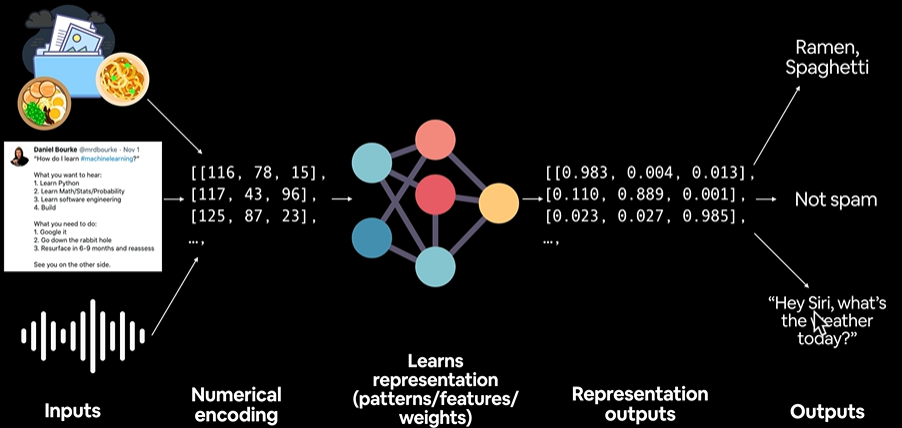


To Showcase this, Let's create some *known* data using linear regression formula.

We will be using a linear regression formula to make straight line with *known* parameter

In [8]:
# create *known* parameters
weight = 0.7
bais = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight * X + bais

X[:10],len(X)



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])